In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

print(yf.__version__)

0.2.51


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime

In [4]:
ticker = '^GSPC'  # S&P 500
start_date = '2014-01-01' # import one year before the start date, so we can calculate moving average and RSI for the first day of 2015
end_date = datetime.now().strftime('%Y-%m-%d')

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
df['50_MA'] = df['Close'].rolling(window=50).mean() # 50 day moving average, this is a common indicator used in trading

In [6]:
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close']) # Relative Strength Index, another common indicator used in trading


In [7]:
df

Price,Close,High,Low,Open,Volume,50_MA,RSI
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2014-01-02,1831.979980,1845.859985,1827.739990,1845.859985,3080600000,NaN,NaN
2014-01-03,1831.369995,1838.239990,1829.130005,1833.209961,2774270000,NaN,NaN
2014-01-06,1826.770020,1837.160034,1823.729980,1832.310059,3294850000,NaN,NaN
2014-01-07,1837.880005,1840.099976,1828.709961,1828.709961,3511750000,NaN,NaN
2014-01-08,1837.489990,1840.020020,1831.400024,1837.900024,3652140000,NaN,NaN
...,...,...,...,...,...,...,...
2025-01-13,5836.220215,5838.609863,5773.310059,5782.020020,4421200000,5952.469189,47.540030
2025-01-14,5842.910156,5871.919922,5805.419922,5859.270020,4142280000,5953.053994,42.288144


In [8]:
df = df[df.index > '2015-01-01']

In [9]:
df

Price,Close,High,Low,Open,Volume,50_MA,RSI
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,2037.662400,55.359228
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,2039.531799,54.185967
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,2040.567600,52.906917
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,2041.794001,61.573624
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,2043.804199,60.908051
...,...,...,...,...,...,...,...
2025-01-13,5836.220215,5838.609863,5773.310059,5782.020020,4421200000,5952.469189,47.540030
2025-01-14,5842.910156,5871.919922,5805.419922,5859.270020,4142280000,5953.053994,42.288144


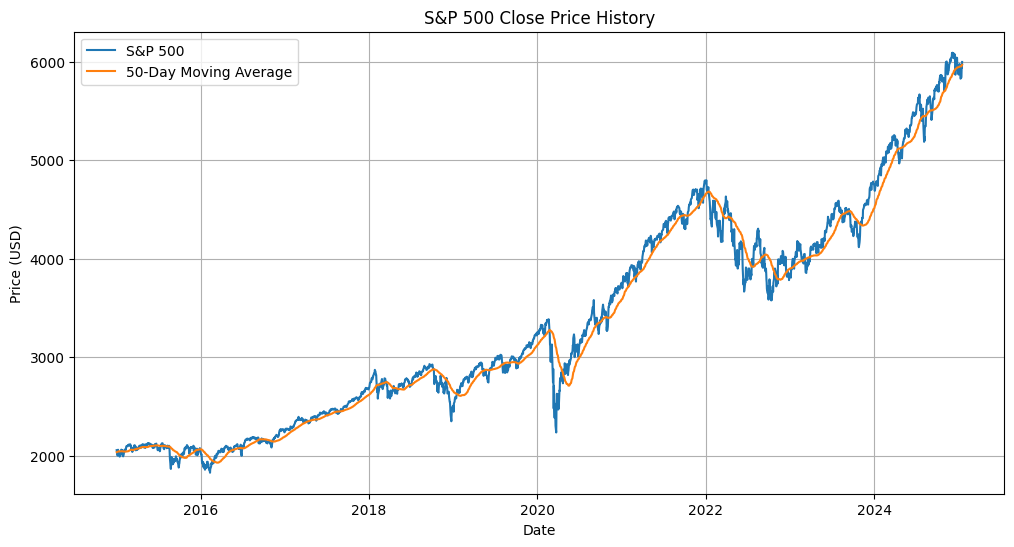

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='S&P 500')
plt.title('S&P 500 Close Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(df['50_MA'], label='50-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df

Price,Close,High,Low,Open,Volume,50_MA,RSI
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,2037.662400,55.359228
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,2039.531799,54.185967
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,2040.567600,52.906917
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,2041.794001,61.573624
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,2043.804199,60.908051
...,...,...,...,...,...,...,...
2025-01-13,5836.220215,5838.609863,5773.310059,5782.020020,4421200000,5952.469189,47.540030
2025-01-14,5842.910156,5871.919922,5805.419922,5859.270020,4142280000,5953.053994,42.288144


In [15]:
import yfinance as yf
import pandas as pd

tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())

data = yf.download(tickers.Symbol.to_list(),start_date,end_date, auto_adjust=True)['Close']
print(data.head())

[                       0%                       ]

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2025-01-19)')
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Ticker              A       AAPL       ABBV  ABNB        ABT       ACGL  \
Date                                                                      
2014-01-02  36.679249  17.234297  32.980286   NaN  30.742823  18.184349   
2014-01-03  37.142544  16.855734  33.183334   NaN  31.072527  17.835686   
2014-01-06  36.959835  16.947643  31.971470   NaN  31.482647  17.667694   
2014-01-07  37.488411  16.826445  32.034935   NaN  31.241398  17.674034   
2014-01-08  38.101784  16.933004  31.952440   NaN  31.522861  17.569435   

Ticker            ACN       ADBE        ADI        ADM  ...        WTW  \
Date                                                    ...              
2014-01-02  67.049652  59.290001  38.885139  31.675949  ...  97.259346   
2014-01-03  67.272812  59.160000  39.145531  31.823315  ...  96.378784   
2014-01-06  66.562065  58.119999  38.924595  31.889631  ...  96.400803   
2014-01-07  67.371971  58.970001  39.129738  31.572790  ...  96.686981   
2014-01-08  67.892624  58.9000

In [16]:
data

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,36.679249,17.234297,32.980286,NaN,30.742823,18.184349,67.049652,59.290001,38.885139,31.675949,...,97.259346,20.373348,165.998657,19.344219,62.739452,29.677324,43.759392,81.981964,53.180000,29.830692
2014-01-03,37.142544,16.855734,33.183334,NaN,31.072527,17.835686,67.272812,59.160000,39.145531,31.823315,...,96.378784,20.418955,164.371719,19.337187,62.588497,29.946632,44.033314,82.337463,53.580002,29.544930
2014-01-06,36.959835,16.947643,31.971470,NaN,31.482647,17.667694,66.562065,58.119999,38.924595,31.889631,...,96.400803,20.210463,164.254303,19.231712,62.682858,29.894512,43.998348,82.870758,53.400002,29.480391
2014-01-07,37.488411,16.826445,32.034935,NaN,31.241398,17.674034,67.371971,58.970001,39.129738,31.572790,...,96.686981,20.269096,168.992584,19.562201,63.569679,29.981394,44.616051,84.523911,53.950001,29.591011
2014-01-08,38.101784,16.933004,31.952440,NaN,31.522861,17.569435,67.892624,58.900002,39.224430,31.211756,...,96.841103,20.080156,172.162613,19.484856,63.362133,29.964016,44.598568,86.594788,53.910000,29.259155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-13,141.949997,234.399994,175.088882,128.850006,112.599121,90.830002,349.140015,408.500000,212.949997,52.119999,...,311.260010,28.660000,81.330002,63.619999,109.290001,115.639999,123.730003,105.489998,381.690002,166.320007
2025-01-14,143.429993,233.279999,173.910004,127.599998,112.430000,91.989998,348.989990,412.709991,214.649994,51.189999,...,313.239990,28.959999,81.800003,64.080002,109.720001,115.419998,124.709999,104.709999,394.399994,164.410004
2025-01-15,142.229996,237.869995,171.350006,132.520004,111.099998,93.620003,349.730011,417.279999,218.220001,51.139999,...,313.350006,29.559999,82.410004,64.940002,111.510002,116.089996,125.769997,106.510002,400.250000,167.169998
